In [2]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

<div class="alert alert-info">

<b>Программа семинара: </b>
    
Зависимы и независимые случайные величины: Корреляция Спирмена, Корреляция Пирсона, Ковариация. Независимость и ковариация
Корреляция в python. Нормальное распределение и его свойства. Многомерное нормальное распределение





<div class="alert alert-info">

<b>Программа семинара: </b>
    

Случайные величины называются независимыми, если закон распределения одной из них не зависит от того какое значение принимает другая случайная величина. 
    
$$P(x)*P(y) = P(x, y )$$


**Теорема**. Для того, чтобы случайные величины Х и Y Были независимы, необходимо и достаточно, чтобы плотность совместного распределения системы (X, Y) была равна произведению плотностей распределения составляющих.
$$f(x,y) = f(x)*f(y)$$
</div>


 

# Ковариация

<div class='alert alert-info'>


**Ковариация** - мера линейной зависимости двух случайных величин, вычисляется как:
    
$$Cov(x,y) = E[(x-E(x))*(y-E(y))]$$
    

$$Cov(x,y) = E[(x-E(x))*(y-E(y))] = $$ 

$$ = E[(x-E(x))*(y-E(y))] = $$

$$ =  E(x*y-x*E(y) - E(x)*y + E(x)*y+E(x)*E(y) )$$

$$ = E(x*y) - E(x*E(y)) - E(E(x)*y) + E(E(x)*E(y))$$

$$ = E(x*y) - E(y)*E(x) - E(x)*E(y) + E(x)*E(y) )$$

<div class='alert alert-info'>
 
$$Cov(x,y) = E(x, y)- E(x)*E(y)$$

Ее свойства вы могли знать из курса теори вероятности или мат. статистики

<div class='alert alert-warning'>

Если величины $X, Y$ независимы, то $Cov(X, Y) = 0$

Обратное неверно.  $Cov(X, Y) = 0$, но случайные величины могут быть зависимы

Если $X, Y$ зависимы, тогда:

$$E(X, Y) = E(X)*E(Y) + Cov(X, Y)$$

$$Var(X + Y) = Var(X) + Var(Y) + 2*Cov(X, Y)$$

<div class='alert alert-warning'>

**Проблема** такой величины, как ковариация в том, что ее размерность равна  произведению размерностей случайных величин. Например **`рост`*`вес`**

<div class='alert alert-info'>


Поэтому вводится безразмерный коэффициент корреляции:

$$p(X, Y) = \frac{Cov(X, Y)}{\sigma(X)*\sigma(Y)}$$


Эту величину называют **Корреляция Пирсона**


Эта величина уже отнормирована и принимает значения от -1 до 1

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png"  width=640></p>


 

<div class='alert alert-warning'>

Корреляция Пирсона улавливает только линейную зависимость и чувствительна к выбросам

# А что делать, если хочется уловить не только линейные корреляции?!

<p style="align: center;"><img align=center src="https://miro.medium.com/max/1400/1*ddkl1A3XDJdlkoMTp6Hlfw.png"  width=640></p>


 

# Где взять? SciPy

In [3]:
N = 1000     # число экспериментов
sigma = 100   # стандартное отклонение наблюдаемых значений
k = 0.5     # теоретическое значение параметра k
b = 2       # теоретическое значение параметра b

def fun(x):
    return k*x + b

In [49]:
# --------------------

In [5]:
x = np.array(range(N))   # Массив значения x от 0 до N
# f = np.array([fun(z) for z in range(N)])  # Значения нашей прямой в каждой точке
f = fun(x)
y = f + np.random.normal(0, sigma, N)  # Зашумим наши значения

In [6]:
# ----------------

In [18]:
new_f = f  + 65
r, _ = scipy.stats.pearsonr(new_f, y)
print('Пирсон', r)

Пирсон 0.8331463708441035


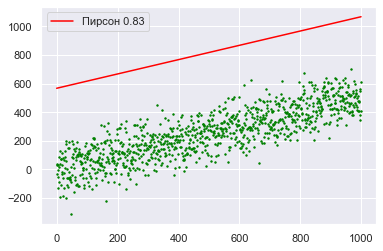

In [19]:
plt.scatter(x, y, s=2, c='green')
plt.plot(f+565, c='red', label = 'Пирсон {}'.format(round(r, 2)));
plt.legend();

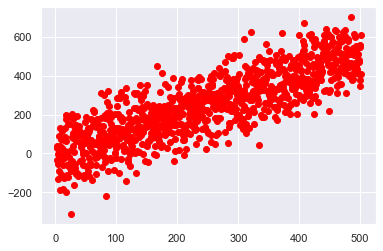

In [20]:
plt.scatter(f, y, c='red', label = 'Пирсон {}'.format(round(r, 2)));

# Уровни корреляции

<p style="align: center;"><img align=center src="./images/cor_level.PNG"  width=640></p>




In [21]:
A = np.random.normal(0, 5, 10)
B = np.random.normal(10, 6, 10)

r, _ = scipy.stats.pearsonr(A, B)
r

0.12379948550498401

# Пирсон и выбросы

Недостатки выборочного коэффициента Пирсона:

* для распределений, отличных от нормального, перестаёт быть
эффективной оценкой популяционного коэффициента корреляции;
* служит мерой только линейной взаимосвязи;
* неустойчив к выбросам.

In [22]:
N = 1000     # число экспериментов
sigma = 10   # стандартное отклонение наблюдаемых значений
k = 0.5     # теоретическое значение параметра k
b = 2       # теоретическое значение параметра b

def fun(x):
    return k*x+b
       
    
def fun_outlier(x):  # Такая же функция, но с выбросом
    if x == 600:
        return k*x+b + 5000
    else:
        return k*x+b
    
    

Пирсон 0.9976020715925239


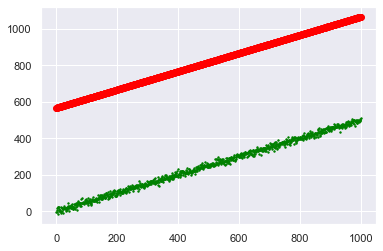

In [23]:
x = np.array(range(N))   # Массив значения x от 0 до N
f = np.array([fun(z) for z in range(N)])  # Значения нашей прямой в каждой точке
y = f + np.random.normal(0, sigma, N)  # Зашумим наши значения


plt.scatter(x, y, s=2, c='green')
plt.scatter(x, f+565, c='red');


r, _ = scipy.stats.pearsonr(y, f)
print('Пирсон', r)

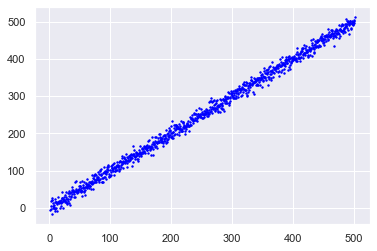

In [24]:
plt.scatter(f, y, s=2, c='blue')

Пирсон 0.6787532620399049


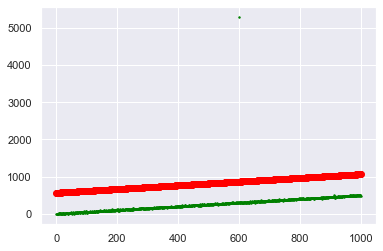

In [25]:
f_out = np.array([fun_outlier(z) for z in range(N)]) 
y = f_out + np.random.normal(0, sigma, N)  # Зашумим наши значения


plt.scatter(x, y, s=2, c='green')
plt.scatter(x, f+565, c='red');


r, _ = scipy.stats.pearsonr(y, f)
print('Пирсон', r)

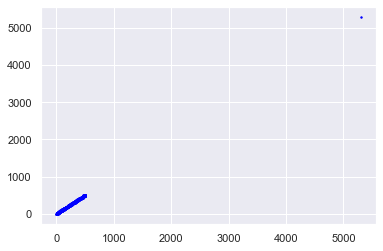

In [26]:
plt.scatter(f_out, y, s=2, c='blue'); 

# Что делать? - придумаем другой коэффициент корреляции. 


<!-- <img src='https://i.ytimg.com/vi/LvfbopVq-WE/maxresdefault.jpg' wight=100>
 -->

Корреляция Спирмена - мера силы монотонной взаимосвязи. Вычисляется как **корреляция Пирсона** между рангами наблюдей

$x_1, x_2, .., x_n$ - упорядоченная по возрастанию выборка

Правила выставления ранга:
1. Порядковый номер наблюдения - ранг

2. Если встречаются несколько одинаковых значений, им присваивается одинаковое значение ранга, равное среднему арифметическому их порядковых номеров


## Пример

**Выборка:** $X: $**10**$, 8, 7, 7, 4, $**10**$, 9, 5$  | $Y: 9, 9, 4, 5, 6, 8, 10, 7$

**Порядок:**  -- $ $**7**$, 5, 3, 4, 1, $**8**$, 6, 2$    |    $7, 6, 1, 2, 3, 5, 8, 4$

**Ранг:** 7.5, 5, 3, 4, 1, 7.5, 6, 2   |  6.5, 6.5, 1, 2, 3, 5, 8, 4

Полученные ранги сравниваем Пирсоном

<p style="align: center;"><img align=center src="./images/spirmen.PNG"  width=640></p>


 

<div class='alert alert-warning'>

Корреляция Спирмэна пытается уловить в данных монотонность

Пирсон 0.9977181063473471
Спирмэн 0.9977832257832259


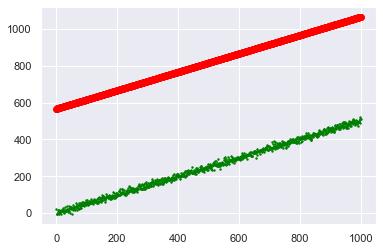

In [27]:
x = np.array(range(N))   # Массив значения x от 0 до N
f = np.array([fun(z) for z in range(N)])  # Значения нашей прямой в каждой точке
y = f + np.random.normal(0, sigma, N)  # Зашумим наши значения


spear, _ = scipy.stats.spearmanr(y, f)
pears, _ = scipy.stats.pearsonr(y, f)

plt.scatter(x, y, s=2, c='green')
plt.scatter(x, f+565, c='red');


print('Пирсон', pears)
print('Спирмэн', spear)

Пирсон 0.6783962432888845
Спирмэн 0.9968843768843769


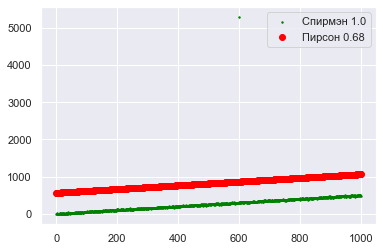

In [105]:
f_out = np.array([fun_outlier(z) for z in range(N)]) 
y = f_out + np.random.normal(0, sigma, N)  # Зашумим наши значения

spear, _ = scipy.stats.spearmanr(y, f)
pears, _ = scipy.stats.pearsonr(y, f)


plt.scatter(x, y, s=2, c='green', label = 'Спирмэн {}'.format(round(spear, 2)));
plt.scatter(x, f+565, c='red', label = 'Пирсон {}'.format(round(pears, 2)));
plt.legend();
 
print('Пирсон', pears)
print('Спирмэн', spear)

# Корреляция не означает причинность!

<p style="align: center;"><img align=center src="https://i2.wp.com/brammels.com/wp-content/uploads/2019/03/korrelyatsiya-5.png?resize=1300%2C513&ssl=1"  width=640></p>


 

 

# Скрытые переменные

<p style="align: center;"><img align=center src="./images/hidden_value.PNG"  width=640></p>


 

 

# Ложные корреляции

<p style="align: center;"><img align=center src="https://images11.popmeh.ru/upload/img_cache/4d7/4d791b29c1a13fc24a9e3f3be192fcdc_cropped_666x485.jpg"  width=640></p>


# Посмотрим корреляции - Scipy

In [8]:
# plt.plot(y, y)

# Датасет - CarPrice

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/CarPrice_Assignment.csv')
print("Dimension of our data set is: ")
print(data.shape)
data.head()

Dimension of our data set is: 
(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Почистим данные (Неважно как это происходит)

In [114]:
data['cylindernumber'] = data.cylindernumber.map({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twelve': 12, 'three': 3})

data.fillna(0, inplace=True)
num_data = data.select_dtypes(include=['int', 'float', 'int64'])
num_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# А что если у вас много признаков? - Матрица корреляции + HeatMap!!!


<p style="align: center;"><img align=center src="./images/heat_map.PNG"  width=840></p>


In [152]:
corr_matrix = num_data.corr() # method='kendall'
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.094493,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.094493,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


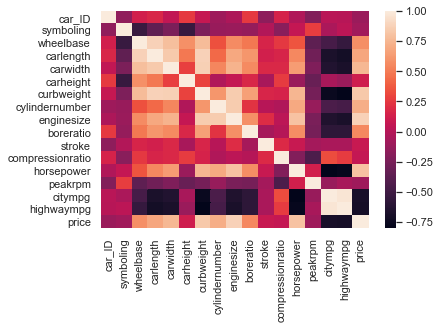

In [117]:
ax = sns.heatmap(corr_matrix)

0.8081388225362218

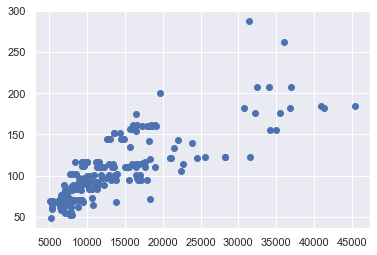

In [121]:
plt.scatter(data.price, data.horsepower)
scipy.stats.pearsonr(data.price, data.horsepower)[0]

In [123]:
# scipy.stats.pearsonr(data.price, data.horsepower)

-0.10909333948229953

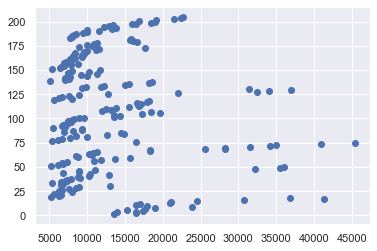

In [124]:
plt.scatter(data.price, data.car_ID)
scipy.stats.pearsonr(data.price, data.car_ID)[0]

# Random VS Fuatures

(0.8081388225362218, 1.483436573293965e-48)

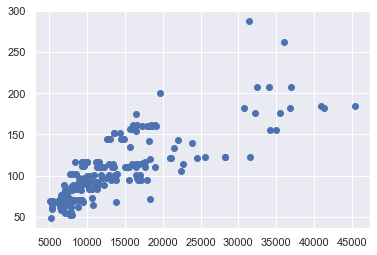

In [13]:
plt.scatter(data.price, data.horsepower)
scipy.stats.pearsonr(data.price, data.horsepower)

(0.08959839266934883, 0.2013973539145435)

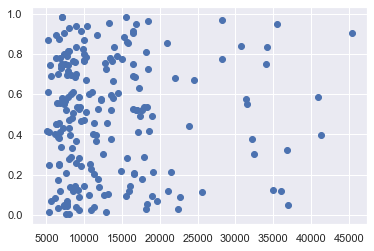

In [14]:
plt.scatter(data.price, np.random.sample(len(data)))
scipy.stats.pearsonr(data.price, np.random.sample(len(data)))

# Улучшаем модель с помощью анализа корреляций

In [ ]:
X_train = num_data.drop(['price','symboling'], axis=1) # car_ID
y_train = num_data.price

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [140]:
lr = LinearRegression()
hyper_params ={'fit_intercept': [True, False]}
model_cv = GridSearchCV(estimator = lr, param_grid =  hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = 3,  verbose = 1, return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)      

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [141]:
print('Ошибка (MSE)', abs(model_cv.best_score_))  # с car_ID

Ошибка (MSE) 18750596.903456897


In [28]:
print('Ошибка (MSE)', abs(model_cv.best_score_)) # Без car_ID

Ошибка (MSE) 16498195.567860177


In [51]:
print('Ошибка (MSE)', abs(model_cv.best_score_))

Ошибка (MSE) 19349728.86170226


<div class="alert alert-info">
<b>Вывод:</b>
   
Признаки, которые плохо коррелируют с целевой переменной - могут быть вредны для моделей    
  
</div>



# Три способа найти корреляцию в Pandas

In [142]:
import pandas as pd
df = pd.DataFrame({'A':[5,91,3],'B':[90, 15,66],'C':[93,27,3]})
df

,A,B,C
0,5,90,93
1,91,15,27
2,3,66,3


In [144]:
df.corr()

,A,B,C
A,1.000000,-0.943228,-0.240882
B,-0.943228,1.000000,0.549571
C,-0.240882,0.549571,1.000000


In [145]:
df.corr(method = 'spearman')

,A,B,C
A,1.0,-0.5,0.5
B,-0.5,1.0,0.5
C,0.5,0.5,1.0


In [146]:
df.corr('kendall')

,A,B,C
A,1.000000,-0.333333,0.333333
B,-0.333333,1.000000,0.333333
C,0.333333,0.333333,1.000000


In [147]:
df2 = pd.DataFrame({'A':[7,93,5],'B':[88,13,64],'C':[93,27,3]})

In [76]:
df2.corr()

,A,B,C
A,1.000000,-0.943228,-0.240882
B,-0.943228,1.000000,0.549571
C,-0.240882,0.549571,1.000000


In [74]:
df2.corr('spearman')

,A,B,C
A,1.0,-0.5,0.5
B,-0.5,1.0,0.5
C,0.5,0.5,1.0


In [75]:
df2.corr('kendall')

,A,B,C
A,1.000000,-0.333333,0.333333
B,-0.333333,1.000000,0.333333
C,0.333333,0.333333,1.000000


## Критерий хи-квадрат

Критерий хи-квадрат — это статистический метод определения значимой корреляции между двумя категориальными переменными. Обе эти переменные должны быть из одной популяции, и они должны быть категоричными, как — Да / Нет, Мужской / Женский, Красный / Зеленый

In [31]:
table = [ [ 10, 5 ],
          [ 6, 8 ] ]
table

[[10, 5], [6, 8]]

In [32]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

test Statistics: 0.8367044413919416
degrees of freedom: 1
p-value: 0.3603410063766622



In [33]:
expected

array([[8.27586207, 6.72413793],
       [7.72413793, 6.27586207]])

# Корреляция между численной и категориальной переменной

In [38]:
import pandas as pd
        
df = pd.DataFrame({
          'A':[ 1, 2, 3],
          'B':['b','a','c']
        })
df

,A,B
0,1,b
1,2,a
2,3,c


In [39]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['B'])
# Drop column B as it is now encoded
one_hot

,a,b,c
0,0,1,0
1,1,0,0
2,0,0,1


In [40]:
df = df.drop('B',axis = 1)
df = df.join(one_hot) # # Join the encoded df 

In [43]:
df.corr(method ='pearson')

,A,a,b,c
A,1.000000,0.0,-0.866025,0.866025
a,0.000000,1.0,-0.500000,-0.500000
b,-0.866025,-0.5,1.000000,-0.500000
c,0.866025,-0.5,-0.500000,1.000000


In [46]:
new_data = data[['fueltype','price']].copy()
one_hot = pd.get_dummies(new_data['fueltype'])
# cmap="YlGnBu"
new_data = new_data.drop('fueltype',axis = 1)
new_data = new_data.join(one_hot) # # Join the encoded df 
new_data.corr(method='kendall')

,price,diesel,gas
price,1.000000,0.114416,-0.114416
diesel,0.114416,1.000000,-1.000000
gas,-0.114416,-1.000000,1.000000


### Сделаем тоже самое для нашего датасета

# Может ли корреляция помочь сгенерировать признак?!

In [47]:
X_train = num_data.drop(['price','car_ID', 'symboling'], axis=1) # car_ID

X_train = X_train.join(one_hot)
y_train = num_data.price

NameError: name 'num_data' is not defined

In [105]:
lr = LinearRegression()
hyper_params ={'fit_intercept': [True, False]}
model_cv = GridSearchCV(estimator = lr, param_grid =  hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = 3,  verbose = 1, return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)      

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [103]:
print('Ошибка (MSE)',abs(model_cv.best_score_))

Ошибка (MSE) 19437997.05543993
